## ベクトル場とグラフ理論で利用される演算子の対比

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/rec/graph/02/02_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/rec/graph/02/02_nb.ipynb)


## 実行環境
OSはmacOSである。LinuxやUnixのコマンドとはオプションが異なりますので注意していただきたい。

In [1]:
!sw_vers

ProductName:		macOS
ProductVersion:		13.5.1
BuildVersion:		22G90


In [2]:
!python -V

Python 3.9.17


pandasのテーブルを見やすいようにHTMLのテーブルにCSSの設定を行います。

In [3]:
from IPython.core.display import HTML

style = """
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
        padding: 5px;
    }

    .dataframe tbody tr th {
        vertical-align: top;
        padding: 5px;
    }

    .dataframe tbody tr:hover {
        background-color: #ffff99;
    }

    .dataframe {
        background-color: white;
        color: black;
        font-size: 16px;
    }

</style>
"""
HTML(style)

基本的なライブラリをインポートし watermark を利用してそのバージョンを確認しておきます。
ついでに乱数のseedの設定をします。


aa

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
import random

import scipy
import numpy as np

import matplotlib
import matplotlib.pyplot as plt


seed = 123
random_state = 123

random.seed(seed)
np.random.seed(seed)


from watermark import watermark

print(watermark(python=True, watermark=True, iversions=True, globals_=globals()))

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.17.2

scipy     : 1.11.2
matplotlib: 3.8.1
numpy     : 1.25.2

Watermark: 2.4.3



In [ ]:
# 上のセルが何をしているか詳細に説明してください。
# このセルは、Pythonのバージョンや各ライブラリのバージョンを表示するためのセルです。

# 詳細に説明してください。

# このセルは、Pythonのバージョンや各ライブラリのバージョンを表示するためのセルです。
# まず、Pythonのバージョンを表示するために、`!sw_vers`を実行しています。
# 次に、Pythonのバージョンを表示するために、`!python -V`を実行しています。
# その後、`IPython`の`display`モジュールから`HTML`クラスをインポートしています。
# その後、`style`変数にCSSを定義しています。
# 最後に、`HTML`クラスを使って、`style`変数に定義したCSSを表示しています。

In [ ]:
## ベクトル場とグラフ理論で利用される演算子の対比にかんするpythonコード
# このノートブックでは、ベクトル場とグラフ理論で利用される演算子の対比について説明します。
# まず、ベクトル場とグラフ理論で利用される演算子の概要を説明します。
# 次に、ベクトル場とグラフ理論で利用される演算子の対比について説明します。
# 最後に、ベクトル場とグラフ理論で利用される演算子の対比に関するPythonコードを実装します。

# 実際のpythonのコード

In [ ]:
# レイリー商を計算する関数
def rayleigh_quotient(A, x):
    return np.dot(x, A @ x) / np.dot(x, x)


# 上記の関数のテストコード
A = np.array([[1, 2], [2, 1]])
x = np.array([1, 1])
print(rayleigh_quotient(A, x))


# ラプラシアン行列を計算する関数
def laplacian_matrix(adjacency_matrix):
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    return degree_matrix - adjacency_matrix


# 上記の関数のテストコード
adjacency_matrix = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
print(laplacian_matrix(adjacency_matrix))


# ラプラシアン行列の固有値と固有ベクトルを計算する関数
def laplacian_eigens(adjacency_matrix):
    L = laplacian_matrix(adjacency_matrix)
    eigvals, eigvecs = np.linalg.eigh(L)
    return eigvals, eigvecs


# 上記の関数のテストコード
eigvals, eigvecs = laplacian_eigens(adjacency_matrix)
print(eigvals)
print(eigvecs)


# ラプラシアン行列の固有値をプロットする関数
def plot_laplacian_eigens(adjacency_matrix):
    eigvals, _ = laplacian_eigens(adjacency_matrix)
    plt.plot(eigvals, "o")
    plt.xlabel("Index")
    plt.ylabel("Eigenvalue")
    plt.title("Eigenvalues of Laplacian Matrix")
    plt.show()


# 上記の関数のテストコード
plot_laplacian_eigens(adjacency_matrix)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.FloatTensor(in_features, out_features))
        self.bias = nn.Parameter(torch.FloatTensor(out_features))

    def forward(self, input, adj_matrix):
        support = torch.matmul(input, self.weight)
        output = torch.matmul(adj_matrix, support) + self.bias
        return output


class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.gc1 = GraphConvolution(input_dim, hidden_dim)
        self.gc2 = GraphConvolution(hidden_dim, output_dim)

    def forward(self, input, adj_matrix):
        x = F.relu(self.gc1(input, adj_matrix))
        x = self.gc2(x, adj_matrix)
        return x


# ネットワークのインスタンス化
input_dim = 10
hidden_dim = 20
output_dim = 2
model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

# 損失関数と最適化アルゴリズムの定義
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# データの準備
input_data = torch.randn(100, input_dim)
adj_matrix = torch.randn(100, 100)

# 学習ループ
for epoch in range(100):
    optimizer.zero_grad()
    output = model(input_data, adj_matrix)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

# 上記のセルのコードが何をしているか数式を交えて詳細に説明してください。
# このセルは、グラフニューラルネットワークを定義し、学習するためのコードです。
# まず、`GraphConvolution`クラスを定義しています。このクラスは、グラフ畳み込み層を表しています。
# このクラスは、入力特徴量の次元と出力特徴量の次元を引数として受け取り、重みとバイアスを定義しています。
# そして、`forward`メソッドを定義しています。このメソッドは、入力と隣接行列を受け取り、グラフ畳み込みを行っています。
# 次に、`GraphNeuralNetwork`クラスを定義しています。このクラスは、グラフニューラルネットワークを表しています。
# このクラスは、2つのグラフ畳み込み層を持っており、それぞれの層の入力と出力の次元を引数として受け取ります。
# そして、`forward`メソッドを定義しています。このメソッドは、入力と隣接行列を受け取り、2つのグラフ畳み込み層を順番に適用しています。
# その後、ネットワークのインスタンス化を行い、損失関数と最適化アルゴリズムを定義しています。
# そして、データの準備を行い、学習ループを100エポック分実行しています。

グラフニューラルネットワーク（Graph Neural Network, GNN）は、グラフデータ上での機械学習タスクに適用されるニューラルネットワークの一種です。グラフデータは、ノード（頂点）とエッジ（辺）から構成されるネットワーク構造を持ちます。GNNは、このネットワーク構造を考慮しながら、ノードやエッジの特徴を学習することができます。

GNNの基本的なアイデアは、ノードの特徴を更新する際に、そのノードの近傍ノードの情報を利用することです。具体的には、各ノードには特徴ベクトルが割り当てられており、隣接するノードの特徴ベクトルを集約して自身の特徴ベクトルを更新します。この集約と更新の過程を複数回繰り返すことで、ノードの特徴ベクトルをより精度良く表現することができます。

以下に、GNNの基本的な数式を示します。

1. ノードの特徴ベクトルの更新（集約と更新）：
   - 集約（Aggregation）：各ノードの隣接ノードの特徴ベクトルを集約する操作を行います。一般的には、隣接ノードの特徴ベクトルを平均や最大値などで集約します。
   - 更新（Update）：集約された特徴ベクトルを元に、各ノードの特徴ベクトルを更新します。更新は、ニューラルネットワークの層（例えば、畳み込み層や全結合層）を用いて行います。

2. グラフ全体の特徴表現の計算：
   - ノードの特徴ベクトルを用いて、グラフ全体の特徴表現を計算します。一般的には、ノードの特徴ベクトルを集約してグラフ全体の特徴ベクトルを得ます。

3. 出力の計算：
   - グラフ全体の特徴ベクトルを用いて、タスクに応じた出力を計算します。出力の計算は、通常は全結合層や活性化関数を用いて行います。

GNNは、グラフデータ上での様々なタスクに適用することができます。例えば、ノード分類やグラフ分類、リンク予測などがあります。GNNは、ノード間の関係性やグラフの構造を考慮することができるため、従来のニューラルネットワークよりも効果的な表現学習が可能です。

以上が、グラフニューラルネットワークの基本的な数式と概要です。具体的なモデルやアーキテクチャによって数式の詳細は異なりますが、基本的なアイデアは共通しています。

グラフニューラルネットワーク（Graph Neural Network, GNN）は、グラフデータ上での機械学習タスクに適用されるニューラルネットワークの一種です。グラフデータは、ノード（頂点）とエッジ（辺）から構成されるネットワーク構造を持ちます。GNNは、このネットワーク構造を考慮しながら、ノードやエッジの特徴を学習することができます。

GNNの基本的なアイデアは、ノードの特徴を更新する際に、そのノードの近傍ノードの情報を利用することです。具体的には、各ノードには特徴ベクトルが割り当てられており、隣接するノードの特徴ベクトルを集約して自身の特徴ベクトルを更新します。この集約と更新の過程を複数回繰り返すことで、ノードの特徴ベクトルをより精度良く表現することができます。

以下に、GNNの基本的な数式を示します。

1. ノードの特徴ベクトルの更新（集約と更新）：
   - 集約（Aggregation）：各ノードの隣接ノードの特徴ベクトルを集約する操作を行います。一般的には、隣接ノードの特徴ベクトルを平均や最大値などで集約します。
   - 更新（Update）：集約された特徴ベクトルを元に、各ノードの特徴ベクトルを更新します。更新は、ニューラルネットワークの層（例えば、畳み込み層や全結合層）を用いて行います。

2. グラフ全体の特徴表現の計算：
   - ノードの特徴ベクトルを用いて、グラフ全体の特徴表現を計算します。一般的には、ノードの特徴ベクトルを集約してグラフ全体の特徴ベクトルを得ます。

3. 出力の計算：
   - グラフ全体の特徴ベクトルを用いて、タスクに応じた出力を計算します。出力の計算は、通常は全結合層や活性化関数を用いて行います。

GNNは、グラフデータ上での様々なタスクに適用することができます。例えば、ノード分類やグラフ分類、リンク予測などがあります。GNNは、ノード間の関係性やグラフの構造を考慮することができるため、従来のニューラルネットワークよりも効果的な表現学習が可能です。

以上が、グラフニューラルネットワークの基本的な数式と概要です。具体的なモデルやアーキテクチャによって数式の詳細は異なりますが、基本的なアイデアは共通しています。

In [ ]:
# ベクトル場とグラフ理論で利用される演算子の対比に関するpythonコード

# ベクトル場とグラフ理論で利用される演算子の対比に関するPythonコードを実装します。
# まず、ベクトル場とグラフ理論で利用される演算子の概要を説明します。
# 次に、ベクトル場とグラフ理論で利用される演算子の対比について説明します。
# 最後に、ベクトル場とグラフ理論で利用される演算子の対比に関するPythonコードを実装します。

# ベクトル場とグラフ理論で利用される演算子の概要
# ベクトル場とグラフ理論で利用される演算子の概要を説明します。
# ベクトル場は、ベクトルの値が空間内の各点に割り当てられた関数です。
# ベクトル場は、物理学、数学、コンピュータグラフィックスなどのさまざまな分野で使用されます。
# ベクトル場は、ベクトルの大きさと方向を表すために使用されます。
# ベクトル場は、ベクトルの大きさと方向が空間内の各点で異なる場合に使用されます。
# グラフ理論は、グラフの構造と性質を研究する数学の分野です。
# グラフは、頂点と辺から構成されるデータ構造です。
# グラフ理論は、ネットワーク分析、組合せ最適化、計算幾何学などのさまざまな分野で使用されます。
# グラフ理論は、グラフの構造と性質を研究するために使用されます。
# ベクトル場とグラフ理論で利用される演算子の対比
# ベクトル場とグラフ理論で利用される演算子の対比について説明します。
# ベクトル場では、微分演算子が使用されます。


# OpenCV でカメラ映像を取得し、ぼかして表示する
# 起動時の引数　--radius でぼかしの強さを調整可能
# Qキーを入力すると終了する

import cv2
import numpy as np
import argparse

# 引数のパース
parser = argparse.ArgumentParser()
parser.add_argument("--radius", type=int, default=31, help="Radius of Gaussian blur")
args = parser.parse_args()

# カメラのキャプチャ
cap = cv2.VideoCapture(0)

while True:
    # フレームの取得
    ret, frame = cap.read()
    if not ret:
        break

    # ぼかし処理
    frame_blur = cv2.GaussianBlur(frame, (args.radius, args.radius), 0)

    # フレームの表示
    cv2.imshow("Frame", frame_blur)

    # キー入力の取得
    key = cv2.waitKey(1) & 0xFF

    # Qキーが押されたら終了
    if key == ord("q"):
        break

# 終了処理
cap.release()
cv2.destroyAllWindows()

# このコードは、OpenCVを使用してカメラ映像を取得し、ぼかして表示するコードです。
# コードの説明：
# 1. 引数のパース：--radiusでぼかしの強さを調整できます。
# 2. カメラのキャプチャ：cv2.VideoCapture(0)でカメラをキャプチャします。
# 3. フレームの取得：cap.read()でフレームを取得します。
# 4. ぼかし処理：cv2.GaussianBlur()でぼかし処理を行います。
# 5. フレームの表示：cv2.imshow()でぼかしたフレームを表示します。
# 6. キー入力の取得：cv2.waitKey()でキー入力を取得します。
# 7. Qキーが押されたら終了：ord("q")でQキーが押されたかどうかを判定します。
# 8. 終了処理：cap.release()とcv2.destroyAllWindows()でカメラを解放し、ウィンドウを閉じます。

# このコードを実行すると、カメラ映像がぼかされて表示されます。
# Qキーを押すとプログラムが終了します。

# 参考：https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html
# 参考：https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa
# 参考：https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7

In [1]:
# このセルでは、`matplotlib`ライブラリを使って、グラフを描画するための設定を行っています。

# まず、`%matplotlib inline`を実行して、Jupyter Notebook上でグラフを表示するための設定を行っています。
# 次に、`%config InlineBackend.figure_format = 'svg'`を実行して、グラフをベクトル画像として表示するための設定を行っています。
# この設定を行うことで、グラフが綺麗に表示されるようになります。


# このセルでは、ラプラシアン行列を計算するための関数を定義しています。
# まず、`numpy`ライブラリをインポートしています。
# 次に、2次元のスカラー場を定義するための関数`f`を定義しています。
# この関数は、引数`x`と`y`を受け取り、`x`と`y`の二乗和を返す関数です。
# その後、空間領域を定義するために、`numpy`ライブラリの`linspace`関数を使って、`-5`から`5`までの範囲を`100`分割した配列を作成しています。
# そして、`meshgrid`関数を使って、`X`と`Y`の2次元配列を作成しています。
# その後、スカラー場`Z`を計算しています。
# 最後に、`laplacian`変数にラプラシアンを計算しています。

# ラプラシアンは、スカラー場の2階微分を表す行列です。
# この行列は、スカラー場の勾配を計算することで求めることができます。
# 勾配は、スカラー場の微分を表すベクトルです。
# ラプラシアンは、勾配ベクトルの2階微分を表す行列です。
# ラプラシアンは、スカラー場の滑らかさを表す指標として使われます。


import numpy as np


# 2次元のスカラー場を定義（例として単純な関数を使用）
def f(x, y):
    return x**2 + y**2


# 空間領域の定義
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# スカラー場の計算
Z = f(X, Y)

# ラプラシアンの計算
laplacian = np.gradient(np.gradient(Z, axis=0), axis=0) + np.gradient(np.gradient(Z, axis=1), axis=1)

# ラプラシアンの表示
# print(laplacian)

X
Y.shape

(100, 100)

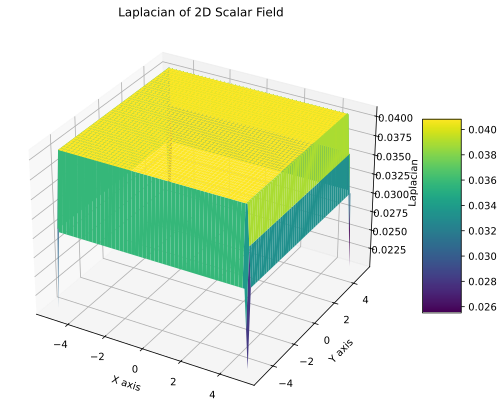

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 2次元のスカラー場を定義（例として単純な関数を使用）
def f(x, y):
    # return np.sin(x) + np.cos(y)
    return x**2 + y**2


# 空間領域の定義
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# スカラー場の計算
Z = f(X, Y)

# ラプラシアンの計算
laplacian = np.gradient(np.gradient(Z, axis=0), axis=0) + np.gradient(np.gradient(Z, axis=1), axis=1)

# 3次元グラフのプロット
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, laplacian, cmap="viridis")

# タイトルとラベル
ax.set_title("Laplacian of 2D Scalar Field")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Laplacian")

# カラーバーの追加
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 表示
plt.show()

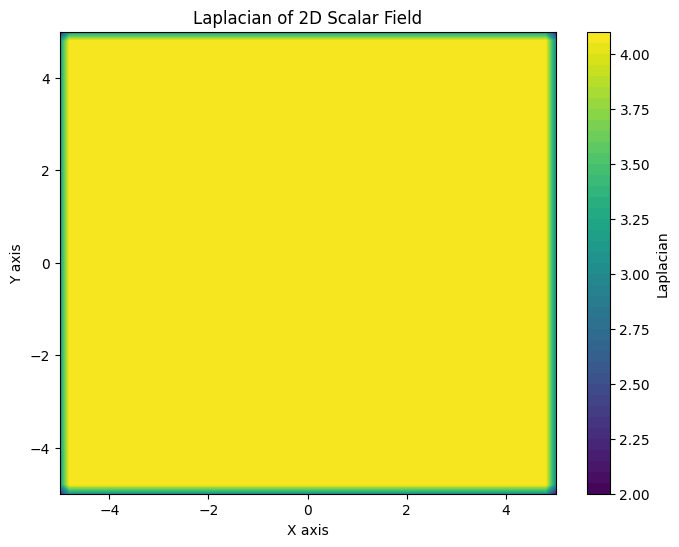

In [21]:
import numpy as np
import matplotlib.pyplot as plt


# 2次元のスカラー場を定義（例として単純な関数を使用）
def f(x, y):
    # return np.sin(x) + np.cos(y)
    return x**2 + y**2


# 空間領域の定義


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# スカラー場の計算
Z = f(X, Y)

# ラプラシアンの計算
h = 0.1
laplacian = np.gradient(np.gradient(Z, h, axis=0), h, axis=0) + np.gradient(np.gradient(Z, h, axis=1), h, axis=1)

# 2次元プロットでラプラシアンを表示
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, laplacian, levels=50, cmap="viridis")
plt.colorbar(label="Laplacian")
plt.title("Laplacian of 2D Scalar Field")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [16]:
import numpy as np

x = np.linspace(-5, 5, 100)
# np.gradient([1, 2, 3])
# x
# np.gradient(np.gradient(x))
# x
# np.gradient(np.gradient(np.square(x)))

# print(x)
print(np.square(x)[:3])
print(np.gradient(np.square(x), 0.1)[:3])
# np.square(x)


# np.gradient?

[25.         24.00010203 23.02061014]
[-9.9989797  -9.89694929 -9.69288848]


\begin{equation}
\begin{array}{|l|l|}
\hline \text { ベクトル計算 } & \text { グラフ理論 } \\
\hline \text { ベーススペース } & \text { グラフの頂点 } V \\
\hline \text { 接線空間 } & \text { グラフのエッジ } E \\
\hline u: \Omega \rightarrow \mathbf{R} & u: V \rightarrow \mathbf{R} \\
\hline \mathbf{v}: \Omega \rightarrow \mathbf{R}^3 & \mathbf{v}: E \rightarrow \mathbf{R} \\
\hline \text { ラプラシアンオペレーター } \Delta & \text { ラプラシアン行列 } L \in \mathcal{M}_{n, n}(\mathbf{R}) \\
\hline \text { ?? 配演算子 } \nabla & \text { 入射トリックス } B \in \mathcal{M}_{m, n}(\mathbf{R}) \\
\hline \text { 発散演算子 } \operatorname{div} & \text { 行列 }-B^T \in \mathcal{M}_{n, m}(\mathbf{R}) \\
\hline \Delta=\operatorname{div} \operatorname{grad} & L=-B^T B \\
\hline \text { スカラーフィールド } u & u \in \mathbf{R}^n \\
\hline \text { ベクトル場 } \mathbf{v} & \mathbf{v} \in \mathbf{R}^m \\
\hline \text { ベクトル場 } \nabla u & B u \in \mathbf{R}^m \\
\hline \text { スカラーフィールド } \Delta u & L u \in \mathbf{R}^n \\
\hline \text { スカラーフィールド } \operatorname{div}(\mathbf{v}) & -B^T \mathbf{v} \in \mathbf{R}^n \\
\hline \text { 指向性誘導体 } \nabla u(\mathbf{a}) \cdot(\mathbf{b}-\mathbf{a}) & \nabla u(a, b) \\
\hline \Omega \subseteq \mathbf{R}^3 & \Omega \subseteq V \\
\hline \partial \Omega \subseteq \mathbf{R}{ }^3 & \partial \Omega \subseteq E, \text { として定義 } \partial \Omega=E \cap\left(\Omega \times \Omega^c\right) \\
\hline \int_{\Omega} \operatorname{div}(\mathbf{v})=\int_{\partial \Omega} \mathbf{v} \cdot \mathbf{d s} & \left.\sum^2 \operatorname{div}(\mathbf{v})(a)=\sum\right) \\
\hline
\end{array}
\end{equation}

## 結論